# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
# Your code here:
data.dtypes
# no categorical data

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
data.isna().sum()
#no missing value

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


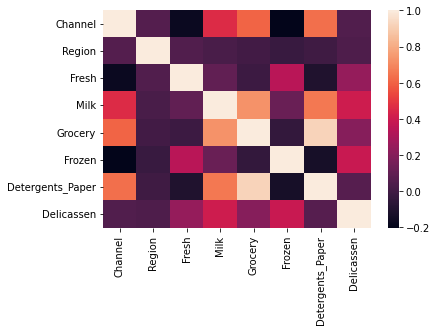

In [8]:
import seaborn as sns
sns.heatmap(data.corr())
data.corr()
# Detergents_Paper & Grocery are positively high correlated, remove Detergents_Paper

In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


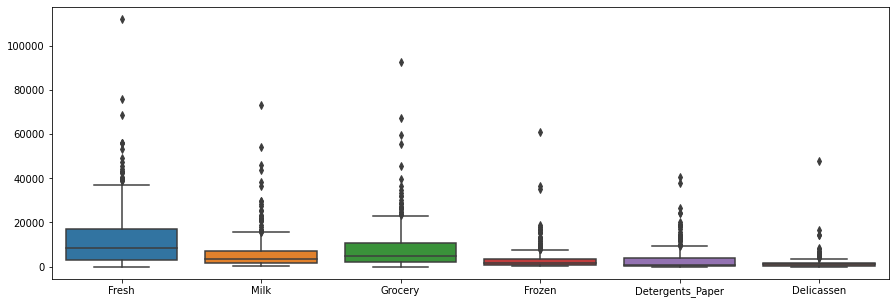

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5

sns.boxplot(data=data.iloc[:,2:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda75ecc250>,
      dtype=object)

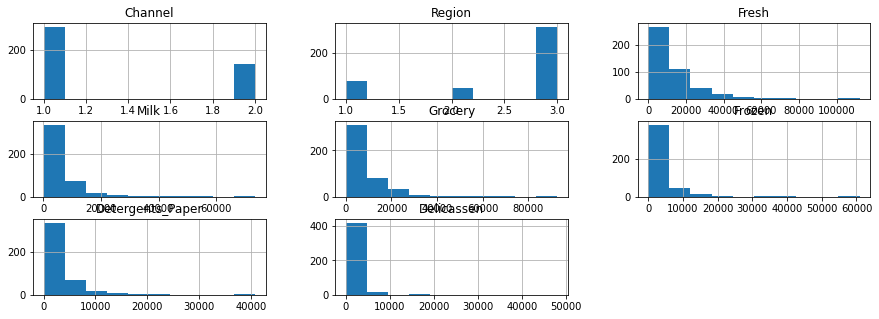

In [12]:
data.hist()
# data are mostly right-skewed , except for Region which is left-skewed

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
sc = StandardScaler()
sc.fit(data)
customers_scale=sc.transform(data)
customers_scale

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [14]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(customers_scale)
y_kmeans = kmeans.predict(customers_scale)
data['labels']=kmeans.labels_

Count the values in `labels`.

In [15]:
# Your code here:
data['labels'].value_counts()

1    170
3     94
5     84
0     43
4     37
6      6
7      5
2      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
# Your code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(customers_scale)
data['labels_DBSCAN']=dbscan_cluster1.labels_

Count the values in `labels_DBSCAN`.

In [17]:
# Your code here
data['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

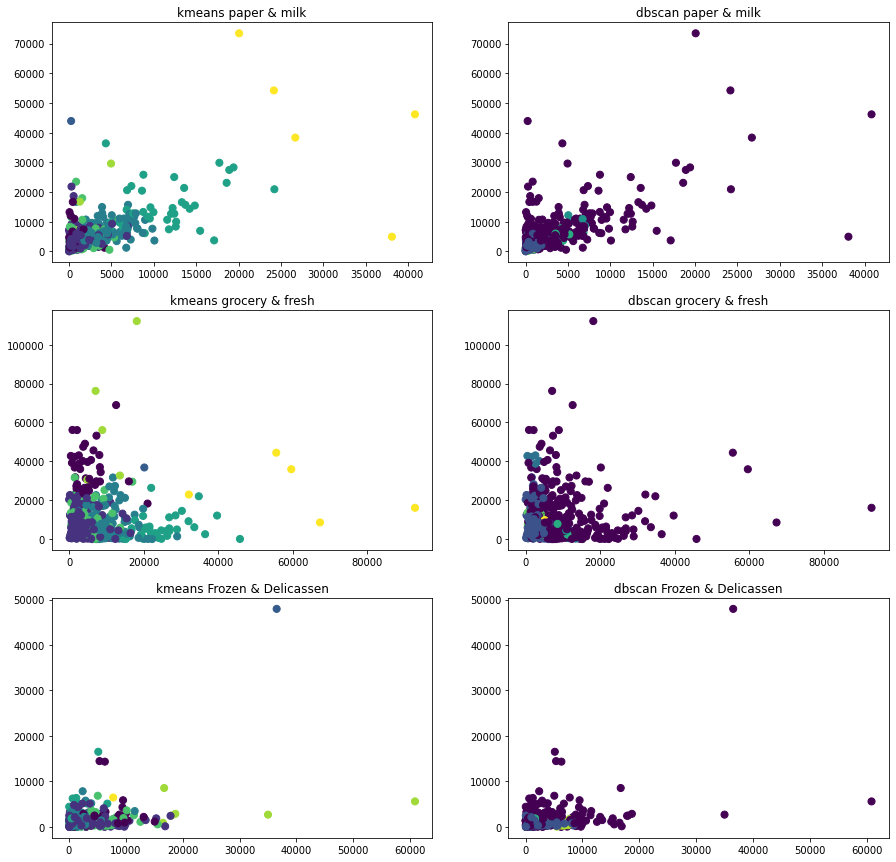

In [19]:
# Your code here:

fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0][0].set_title('kmeans paper & milk')
ax[0][0].scatter(x=data['Detergents_Paper'], y=data['Milk'], c=data['labels'], s=50, cmap='viridis')

ax[0][1].set_title('dbscan paper & milk')
ax[0][1].scatter(x=data['Detergents_Paper'], y=data['Milk'], c=data['labels_DBSCAN'], s=50, cmap='viridis')

ax[1][0].set_title('kmeans grocery & fresh')
ax[1][0].scatter(x=data['Grocery'], y=data['Fresh'], c=data['labels'], s=50, cmap='viridis')

ax[1][1].set_title('dbscan grocery & fresh')
ax[1][1].scatter(x=data['Grocery'], y=data['Fresh'], c=data['labels_DBSCAN'], s=50, cmap='viridis')

ax[2][0].set_title('kmeans Frozen & Delicassen')
ax[2][0].scatter(x=data['Frozen'], y=data['Delicassen'], c=data['labels'], s=50, cmap='viridis')

ax[2][1].set_title('dbscan Frozen & Delicassen')
ax[2][1].scatter(x=data['Frozen'], y=data['Delicassen'], c=data['labels_DBSCAN'], s=50, cmap='viridis')

In [20]:
# Your code here:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(customers_scale, kmeans.labels_).round(6)
dbscan_silhouette = silhouette_score(customers_scale, dbscan_cluster1.labels_).round (6)
print(kmeans_silhouette,dbscan_silhouette)
# higher silhouette coefficient suggesr better clusters, so kmeans is better

0.357829 -0.131043


In [21]:
# Your code here:
data.groupby('labels').agg('mean').iloc[:,:-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,1.046512,2.813953,35127.558140,4249.302326,5047.860465,4978.069767,730.232558,2292.348837
1,1.000000,3.000000,8340.858824,2913.294118,3420.405882,2686.370588,783.647059,1001.729412
2,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
3,2.000000,2.840426,8596.978723,7380.670213,11350.925532,1465.574468,4707.340426,1442.840426
4,2.000000,2.162162,5694.540541,15773.594595,24499.594595,1707.918919,11545.189189,2463.081081
5,1.047619,1.297619,10105.940476,3214.654762,4098.702381,3146.892857,882.773810,1079.535714
6,1.000000,2.500000,53187.500000,10614.500000,9123.500000,27650.000000,1552.000000,3858.166667
7,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000


In [22]:
data.groupby('labels_DBSCAN').agg('mean').iloc[:,:-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000


# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

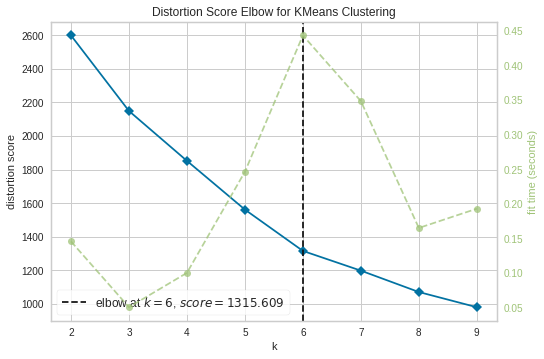

In [23]:
# Your code here
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10)) # range of potential no. of cluster
visualizer.fit(customers_scale)
visualizer.poof()

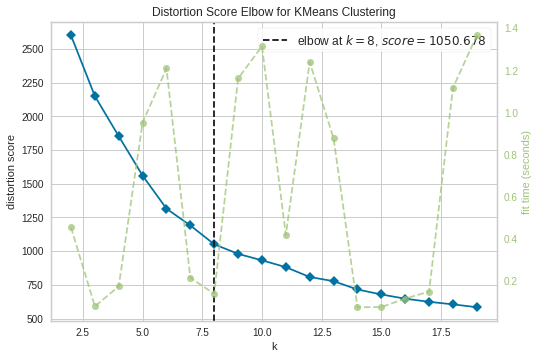

In [24]:
visualizer = KElbowVisualizer(estimator = model, k = (2,20)) # range of potential no. of cluster
visualizer.fit(customers_scale)
visualizer.poof()

In [25]:
# Your comment here
# it seems like 6 or 8 is optimal no. of cluster

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [26]:
# Your code here
dbscan_cluster1 = DBSCAN(eps=2, min_samples=10)
dbscan_cluster1.fit(customers_scale)
data['labels_DBSCAN2']=dbscan_cluster1.labels_

# Visualizing DBSCAN


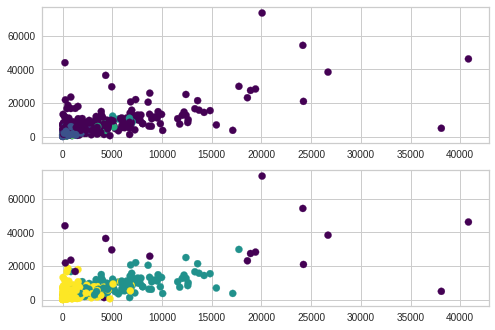

In [27]:
# Your comment here
fig, ax = plt.subplots(2,1)
ax[0].scatter(x=data['Detergents_Paper'], y=data['Milk'], c=data['labels_DBSCAN'], s=50, cmap='viridis')
ax[1].scatter(x=data['Detergents_Paper'], y=data['Milk'], c=data['labels_DBSCAN2'], s=50, cmap='viridis')